# 101. 对称二叉树
简单
相关标签
相关企业
给你一个二叉树的根节点 root ， 检查它是否轴对称。
给你一个二叉树的根节点 root ， 检查它是否轴对称。

 

示例 1：
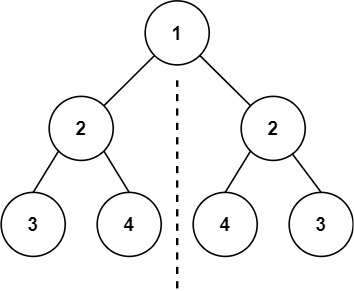

输入：root = [1,2,2,3,4,4,3]
输出：true
示例 2：
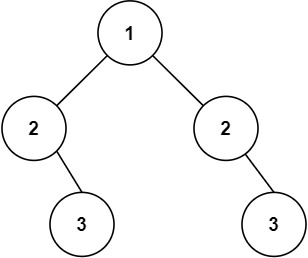

输入：root = [1,2,2,null,3,null,3]
输出：false
 

提示：

树中节点数目在范围 [1, 1000] 内
-100 <= Node.val <= 100
 

进阶：你可以运用递归和迭代两种方法解决这个问题吗？

In [ ]:
import collections
def isSymmetric(root):
    """
    :type root: TreeNode
    :rtype: bool
    """
    if not root:
        return False
    queue = collections.deque([root.left,root.right])
    while queue:
        level = []
        level_size = len(queue)
        if level_size %2 !=0:
            return False
        for i in range(level_size):
            node = queue.popleft()
            if node:
                level.append(node.val)
                queue.append(node.left)
                queue.append(node.right)
            else:
                level.append(None)
        if level != level[::-1]:
            return False

    return True

## 递归法
1. 确定递归函数的参数和返回值
bool compare(TreeNode* left, TreeNode* right)
2. 确定终止条件
if (left == NULL && right != NULL) return false;
else if (left != NULL && right == NULL) return false;
else if (left == NULL && right == NULL) return true;
else if (left->val != right->val) return false; // 注意这里我没有使用else
3. 确定单层递归的逻辑
此时才进入单层递归的逻辑，单层递归的逻辑就是处理 左右节点都不为空，且数值相同的情况。
比较二叉树外侧是否对称：传入的是左节点的左孩子，右节点的右孩子。
比较内侧是否对称，传入左节点的右孩子，右节点的左孩子。
如果左右都对称就返回true ，有一侧不对称就返回false 

In [ ]:
## 前序递归
class Solution:
    def isSymmetric(self, root):
        if not root:
            return True
        return self.compare(root.left, root.right)
    def compare(self,left,right):
        #首先排除空节点的情况
        if left == None and right != None: return False
        elif left != None and right == None: return False
        elif left == None and right == None: return True
        #排除了空节点，再排除数值不相同的情况
        elif left.val != right.val: return False
        
        #此时就是：左右节点都不为空，且数值相同的情况
        #此时才做递归，做下一层的判断
        outside = self.compare(left.left, right.right) #左子树：左、 右子树：右
        inside = self.compare(left.right, right.left) #左子树：右、 右子树：左
        isSame = outside and inside #左子树：中、 右子树：中 （逻辑处理）
        return isSame
    
    
    